## Part A: Classification

### A1. Supervised learning


1) Explain supervised machine learning, the notion of labelled data, and train and test datasets.


Supervised machine learning uses labelled data as inputs, to train the machine learning model to obtain a desired output. The correct outputs are given to the model so that the model can learn over time using the labelled dataset. Labelled data is data that is given meaningful tags or labels which corresponds to the data's element. Labelling is usually done by a human operator and the labelled data is used to train supervised machine learning models. Training is done on a model for it to learn from a training dataset and make new predictions on new instances. Test datasets are datasets that are not used in the training of the model and is used to test the performance of the trained machine learning model. 

2) Read the ‘FIT1043-Essay-Features.csv’ file and separate the features and the label
(Hint: the label, in this case, is the ‘score’)


In [56]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [57]:
essay = pd.read_csv("FIT1043-Essay-Features.csv")

In [58]:
essay

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3


In [59]:
dataIn = essay.iloc[:, [0, 17]].values # first 18 col for input data
label = essay.iloc[:, 18].values # labelled data

3) Use the sklearn.model_selection.train_test_split function to split your data for training and testing.

In [60]:
from sklearn.model_selection import train_test_split
dataIn_train, dataIn_test, label_train, label_test = train_test_split(
dataIn, label, test_size = 0.25, random_state = 0)

### A2. Classification (Training)

1) Explain the difference between binary and multi-class classification.

Binary classification is when a given item is classified into one of two classes, while multi-class classification is used to predict one or more classes for an item.

2) In preparation for classification, your data should be
normalised/scaled.

a. Describe what you understand from this need to normalise data (this is in your Week 7 applied session).

b. Choose and use the appropriate normalisation
functions available in sklearn.preprocessing and scale
the data appropriately.

a. Normalisation of data is needed to ensure that the data features are on a similar scale. This improves the performance and stability of the model, this also prevents certain features from dominating others due to a larger scale.

In [61]:
# b. Normalisation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataIn_train = sc.fit_transform(dataIn_train)
dataIn_test = sc.transform(dataIn_test)

3) Use the Support Vector Machine algorithm to build the model.

a. Describe SVM. Again, this is not in your lecture content, you need to do some self-learning.

b. In SVM, there is something called the kernel. Explain what you understand from it.

c. Write the code to build a predictive SVM model using your training dataset.

(Note: You are allowed to engineer or remove features as you deem appropriate)

a. Support vector machine (SVM) is a type of supervised learning algorithm that can be used on both regression and classification tasks. This method requires an input dataset of already labelled data, and using that data it will plot hyperplanes that separate the data into two categories. SVM finds the hyperplane that best separates the two categories by maximizing the distance between two points in either category. This distance is known as the margin. The points close to the hyperplane are known as support vectors and influence the position of the hyperplane. 

b. Kernels are sets of different algorithms used for pattern analysis. Kernels are used in SVMs by Kernel tricks, where the data is transformed to find an optimal boundary for the dataset. There are different types of kernel functions, these include linear, polynomial and many others. 

In [62]:
# c. SVM model

from sklearn import svm
classify = svm.SVC(kernel='linear')
classify.fit(dataIn_train, label_train)

SVC(kernel='linear')

4) Repeat Task A2.3.c by using another classification algorithm such as Decision Tree or Random Forest algorithms instead of SVM.


In [63]:
# c. using Decision tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(
criterion = 'entropy', random_state = 0
)
classifier.fit(dataIn_train, label_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### A3. Classification (Prediction)

1) Using the testing dataset you created in Task A1.3 above, conduct the prediction for the ‘score’ (label) using the two models built by SVM and your other classification algorithm in A2.4.

In [64]:
# prediction for SVM
pred = classify.predict(dataIn_test)

# prediction for Decision tree
label_pred = classifier.predict(dataIn_test)

2) Display the confusion matrices for both models (it should look like a 6x6 matrix). Unlike the lectures, where it is just a 2x2, you are now introduced to a multi-class classification problem setting.

In [65]:
# confusion matrix for SVM
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(label_test, pred)
cm_svm

array([[  0,   2,   0,   0,   0,   0],
       [  0,  11,  11,   1,   0,   0],
       [  0,   3,  96,  48,   0,   0],
       [  0,   0,  38, 106,   0,   0],
       [  0,   0,   1,  15,   0,   0],
       [  0,   0,   0,   1,   0,   0]], dtype=int64)

In [66]:
# confusion matrix for decision tree
cm = confusion_matrix(label_test, label_pred)
cm

array([[ 0,  2,  0,  0,  0,  0],
       [ 1, 10,  8,  4,  0,  0],
       [ 2,  9, 86, 48,  2,  0],
       [ 0,  2, 48, 86,  7,  1],
       [ 0,  0,  3, 11,  2,  0],
       [ 0,  0,  0,  1,  0,  0]], dtype=int64)

3) Compare the performance of SVM and your other classifier and provide your justification of which one performed better

In [67]:
# compare performance 
from sklearn.metrics import accuracy_score

# performance of SVM
accuracy_score(label_test, pred) *100

63.96396396396396

In [68]:
# performance of decision tree
accuracy_score(label_test, label_pred) *100

55.25525525525525

Comparing the performance percentages of the two models, the SVM perfromed better than the decision tree model, with a score of 64.96% and 55.26%

### A4. Independent evaluation (Competition)

1) Read the ‘FIT1043-Essay-Features-Submission.csv’ file and use the best model you built earlier to predict the ‘score’ for the essays in this file.

In [69]:
submissions = pd.read_csv("FIT1043-Essay-Features-Submission.csv")
submissions

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1226,1208,242,8,8,0,4.991736,13,0,18.615385,237.327684,0.980693,135,0.557851,58,0.239669,244,242
195,862,4039,817,24,11,1,4.943696,47,2,17.382979,812.656033,0.994683,386,0.472460,210,0.257038,750,750
196,1562,2448,468,22,7,0,5.230769,22,0,21.272727,465.656652,0.994993,224,0.478632,101,0.215812,540,526
197,1336,1081,214,14,5,0,5.051402,11,0,19.454545,212.990566,0.995283,114,0.532710,63,0.294393,259,256


In [70]:
Input = submissions.iloc[:, [0, 17]].values
Input_data = sc.fit_transform(Input)
prediction = classify.predict(Input_data)

2) Unlike the previous section in which you have a testing dataset where you know the ‘score’ and will be able to test for the accuracy, in this part, you don’t have a ‘score’ and you have to predict it and submit the predictions along with other required submission files.

a. Output of your predictions should be submitted in a CSV file format. It should contain 2 columns: ‘essayid’ and ‘score’. It should have a total of 200 lines (1 header, and 199 entries).

In [71]:
print(prediction)

[4 3 3 4 4 4 3 3 3 3 4 3 4 3 4 4 4 4 3 4 3 3 4 4 4 3 4 4 4 3 2 4 3 3 4 3 4
 4 3 3 4 3 3 3 2 3 3 4 4 3 3 4 4 4 3 4 3 3 4 4 2 3 3 4 3 4 3 4 3 3 3 3 4 3
 3 3 3 3 4 4 3 4 4 3 4 2 4 4 2 3 4 3 3 3 4 3 4 4 3 3 3 4 2 4 3 4 3 3 4 4 4
 3 4 4 4 3 2 4 2 3 4 4 4 3 2 3 3 4 3 2 4 4 2 3 4 3 3 4 2 3 4 4 4 3 3 4 4 3
 4 4 4 3 3 3 4 3 3 4 3 4 4 3 2 3 4 4 3 3 2 4 3 4 4 3 4 3 4 3 3 4 4 3 4 4 4
 4 3 3 4 3 3 4 4 4 3 4 4 3 4]


In [72]:
df =pd.DataFrame(prediction)
df.rename(columns = {0:'score'}, inplace = True)
df.rename_axis("limbs")
df.index.name = 'essayid'

In [73]:
df.to_csv('predictions.csv')

## Part B : Selection of Dataset, Clustering and Video Preparation

### B1. Selection of a Dataset with missing data, Clustering


1) Select a suitable dataset that contains some missing data and at least two numerical features. Please note you cannot use the same data set used in the applied sessions/lectures in this unit. Please include a link to your dataset in your report. You may wish to:

● provide the direct link to the public dataset from the
internet, or

● place the data file in your Monash student - google
drive and provide its link in the submission.

link to dataset: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

2) Perform wrangling on the dataset to handle the missing data and explain your procedure

In [74]:
melb_data = pd.read_csv('melb_data.csv')
melb_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [75]:
melb_data = melb_data.fillna(method = 'bfill') # fill with next values

In [76]:
melb_data = melb_data.fillna(method = 'pad') # fill with previous values
melb_data.loc[melb_data['YearBuilt'] < 1200]
melb_data = melb_data.drop(9968)

In [77]:
melb_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

3) Perform k-means clustering, choosing two numerical features in your dataset, and apply k-means clustering to your data to create k clusters in Python (k>=2)

Text(0, 0.5, 'Year Built')

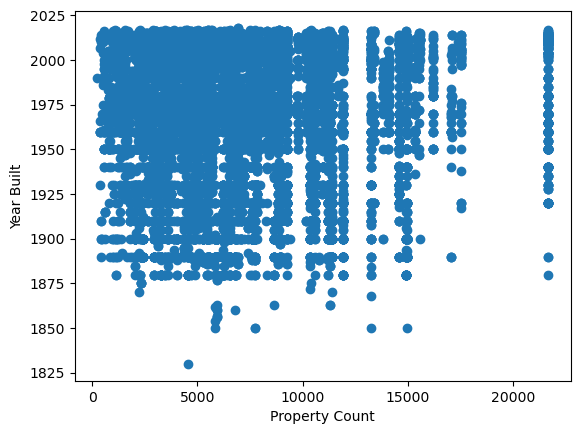

In [81]:
plt.scatter(x=melb_data['Propertycount'],y=melb_data['YearBuilt'])

plt.xlabel('Property Count')
plt.ylabel('Year Built')

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(
melb_data[['Propertycount','YearBuilt']]
)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4) Visualise the data as well as the results of the k-means clustering, and describe your findings about the identified clusters.


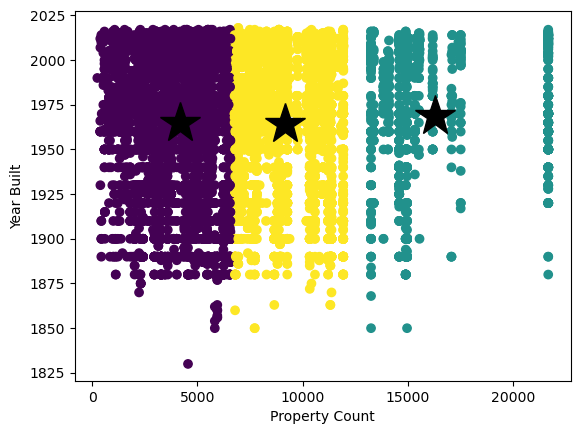

In [83]:
plt.scatter(
    x=melb_data['Propertycount'],y=melb_data['YearBuilt'],
    c=kmeans.labels_)

plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=30
)
plt.xlabel('Property Count')
plt.ylabel('Year Built')
plt.show()

The number of clusters passed into the algorithm is 3, hence 3 clusters are formed and displayed. Each cluster grouped is similar to each other, that is the range of the property count. Each of the 3 clusters differ in this range but the data points grouped share a same range of property count. 